In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Generalized Linear Models</h2>

<h3>1) Ordinary Least Squares</h3>

In [ ]:
dataset = datasets.load_diabetes()
X = dataset.data[:, np.newaxis, 2]
Y = dataset.target.reshape(442, 1)

print(X.shape)
print(Y.shape)

(442, 1)
(442, 1)


In [ ]:
# Implementation
b = np.zeros((X.shape[1], 1))
W = np.zeros((X.shape[1], 1))
learning_rate = 0.001
iterations = 10000
for _ in range(iterations):
    y_hat = b.T + np.dot(X, W.T)
    err = Y - y_hat
    error = np.sum(np.square(err), axis = 0)
    
    db = -2*np.sum(err)
    dW = -2*np.sum(np.dot(X.T, err), axis = 0)
    
    b = b - learning_rate*db
    W = W - learning_rate*dW

print(b, W)

[[152.13348416]] [[949.43525847]]


In [ ]:
# Using sklearn
reg = linear_model.LinearRegression(fit_intercept = True, normalize = False, n_jobs = -1)
reg.fit(X, Y)
print(reg.intercept_, reg.coef_)

[152.13348416] [[949.43526038]]


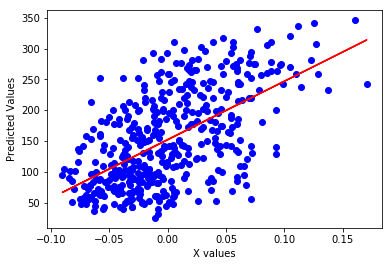

In [ ]:
plt.plot(X, Y, 'bo')
plt.plot(X, y_hat, color = 'red')
plt.xlabel('X values')
plt.ylabel('Predicted Values')
plt.show()

<h3>2) Ridge Regression</h3>

In [ ]:
# Implementation
b = np.zeros((X.shape[1], 1))
W = np.zeros((X.shape[1], 1))
learning_rate = 0.001
iterations = 10000
alpha = 0.8

for _ in range(iterations):
    y_hat = b.T + np.dot(X, W.T)
    err = Y - y_hat
    error = np.sum(np.square(err), axis = 0) + alpha*np.sum(np.square(W))
    
    db = -2*np.sum(err)
    dW = -2*np.sum(np.dot(X.T, err), axis = 0) + 2*alpha*W
    
    b = b - learning_rate*db
    W = W - learning_rate*dW

print(b, W)

[[152.13348416]] [[527.46403355]]


In [ ]:
# Using sklearn
reg = linear_model.Ridge(alpha = 0.8, fit_intercept = True, normalize = False, max_iter = 10000, solver = 'auto')
reg.fit(X, Y)
print(reg.intercept_, reg.coef_)

[152.13348416] [[527.46403355]]


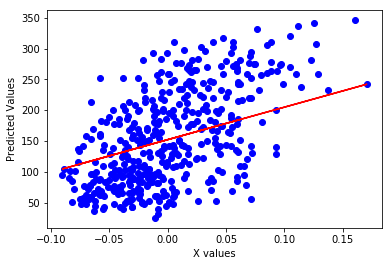

In [ ]:
plt.plot(X, Y, 'bo')
plt.plot(X, y_hat, color = 'red')
plt.xlabel('X values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
# To do cross validation for alpha in Ridge Regression
# Just use a for loop in the implementation to iterarate over all values of the alphas

# In sklearn use RidgeCV
reg = linear_model.RidgeCV(alphas = (0.1, 0.2, 0.3, 0.4), fit_intercept = True, normalize = False, scoring = None, cv = None, gcv_mode = None)
reg.fit(X, Y)
print(reg.intercept_, reg.coef_, reg.alpha_)

[152.13348416] [[863.12296399]] 0.1


<h3>3) Lasso</h3>

In [ ]:
# Implementation when you update all paramters for a iteration
b = np.zeros((X.shape[1], 1))
W = np.zeros((X.shape[1], 1))
learning_rate = 0.1
alpha = 0.8
iterations = 10000

for _ in range(iterations):
    y_hat = b + np.dot(X, W.T)
    err = Y - y_hat
    error = np.sum(np.square(err), axis = 0) / (2*X.shape[0]) + alpha*np.sum(W, axis = 1)

    for a in range(W.shape[0] + 1):
        if a == 0:
            db = (-1/(2*X.shape[0])) * (2*np.sum(err, axis = 0))
            b = b - learning_rate*db
        else:
            if W[a-1, 0] >= 0:
                dw_a = (-1/(2*X.shape[0])) * (2*np.sum(np.dot(err.T, X[:, a-1].reshape(X.shape[0], X.shape[1])), axis = 0)) + alpha
                W[a-1, 0] = W[a-1, 0] - learning_rate*dw_a
            else:
                dw_a = (-1/(2*X.shape[0])) * (2*np.sum(np.dot(err.T, X[:, a-1].reshape(X.shape[0], X.shape[1])), axis = 0)) - alpha
                W[a-1, 0] = W[a-1, 0] - learning_rate*dw_a
                
print(b, W)

[[152.13348416]] [[533.82717351]]


In [ ]:
# When you update a single paramter for a iteration
b = np.zeros((X.shape[1], 1))
W = np.zeros((X.shape[1], 1))
learning_rate = 0.2
alpha = 0.8
iterations = 40000

a = 0

for _ in range(iterations):
    y_hat = b + np.dot(X, W.T)
    err = Y - y_hat
    error = np.sum(np.square(err), axis = 0) / (2*X.shape[0]) + np.sum(np.abs(W), axis = 0)

    if a == W.shape[0]+1:
        a = 0
    
    if a == 0:
        db = (-1/(2*X.shape[0])) * (2*np.sum(err, axis = 0))
        b = b - learning_rate*db
        a += 1
    else:
        if W[a-1, 0] >= 0:
            dw_a = (-1/(2*X.shape[0])) * (2*np.sum(np.dot(err.T, X[:, a-1].reshape(X.shape[0], X.shape[1])), axis = 0)) + alpha
            W[a-1, 0] = W[a-1, 0] - learning_rate*dw_a
            a += 1
        else:
            dw_a = (-1/(2*X.shape[0])) * (2*np.sum(np.dot(err.T, X[:, a-1].reshape(X.shape[0], X.shape[1])), axis = 0)) - alpha
            W[a-1, 0] = W[a-1, 0] - learning_rate*dw_a
            a += 1
                
print(b, W)

[[152.13348416]] [[595.76544198]]


In [ ]:
reg = linear_model.Lasso(alpha = 0.8, fit_intercept = True, normalize = False, precompute = False, max_iter = 40000, positive = False, selection = 'cyclic')
reg.fit(X, Y)
print(reg.intercept_, reg.coef_)
# precompute -> If you want to use gram matrix to speed up calulations
# tol -> Check until the update is smaller than tol

[152.13348416] [595.83526038]


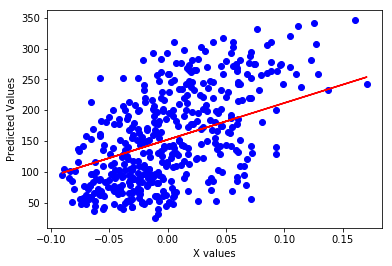

In [ ]:
plt.plot(X, Y, 'bo')
plt.plot(X, y_hat, color = 'red')
plt.xlabel('X values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
# sklearn has another class called lasso_path that computes the coefficients along
# the full path of possible values for lower-level tasks.

In [ ]:
# To do cross validation dor alpha using Lasoo use LassoCV class
reg = linear_model.LassoCV(eps = 0.001, n_alphas = 3, alphas = None, fit_intercept = True, normalize = False, precompute = 'auto', verbose = False, n_jobs = -1, positive = False, selection = 'cyclic')
reg.fit(X, Y.ravel())
print(reg.intercept_, reg.coef_)
# eps -> length of path
# alphas -> List of alphas. If None than it selects automatically

152.1334841628967 [948.48582512]


<h3>4) Multi-task Lasso</h3>